In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import Series,DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,BaggingClassifier,BaggingRegressor
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
data=pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
total_transaction=len(data)
normal_transaction=len(data[data.Class==0])
fraud_transaction=len(data[data.Class==1])
fraud_percentage=round(fraud_transaction/normal_transaction*100,2)


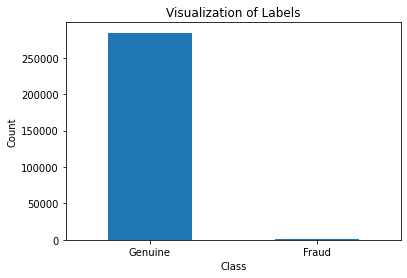

In [ ]:
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

Only 0.17% of transactions are fraudulent.

We can also check for null values

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As per the count per column, we have no null values. Also, feature selection is not the case for this use case. I have observed in our data 28 features are transformed versions of PCA but the Amount is the original one. And, while checking the minimum and maximum is in the amount — I found the difference is huge that can deviate our result.

In [ ]:
min(data.Amount),max(data.Amount)

(0.0, 25691.16)

In this case, it is a good practice to scale this variable. We can use a standard scaler to make it fix.

In [ ]:
sc =StandardScaler()
amount=data['Amount'].values
data['Amount']=sc.fit_transform(amount.reshape(-1,1))

We have one more variable which is the time which can be an external deciding factor — but in our modelling process, we can drop it

In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
data.shape

(284807, 30)

Before removing any duplicate transaction, we are having 284807 transactions in our data. Let’s remove the duplicate and observe the changes.

In [ ]:
data.drop_duplicates(inplace=True)

Let’s now check the count again.

In [ ]:
data.shape

(275663, 30)

So, we were having around ~9000 duplicate transactions.

Before splitting train & test — we need to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y.

In [ ]:
X = data.drop('Class', axis = 1).values
Y = data['Class'].values

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

 We now have two different data set — Train data we will be used for training our model and the data which is unseen will be used for testing.

In [ ]:
DT=DecisionTreeClassifier(max_depth=4,criterion='entropy')
DT.fit(X_train,Y_train)
dt_yhat=DT.predict(X_test)

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(Y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9991438853096524


Checking F1-Score for the decision tree model.

In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(Y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7467811158798283


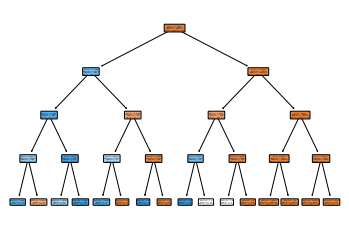

In [ ]:
dec_tree = plot_tree(decision_tree=DT, feature_names = data.columns, 
                     class_names =["2", "4"] , filled = True , precision = 4, rounded = True)

In [ ]:
confusion_matrix(Y_test,dt_yhat,labels=[0,1])

array([[68770,    18],
       [   41,    87]])

Text(0.5, 1.0, 'Accuracy Score: 0.9991438853096524')

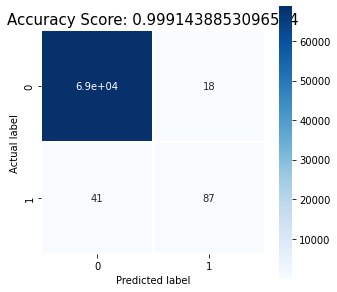

In [ ]:
cm = confusion_matrix(Y_test, dt_yhat)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(DT.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
rf=RandomForestClassifier(max_depth=4)
rf.fit(X_train,Y_train)
rf_yhat=rf.predict(X_test)


In [ ]:
print('Accuracy of Random forest is {}'.format(accuracy_score(Y_test,rf_yhat)))

Accuracy of Random forest is 0.9991438853096524


In [ ]:
print('F1score of random forest is {}'.format(f1_score(Y_test,rf_yhat)))

F1score of random forest is 0.7102803738317758


In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, Y_train)
xgb_yhat = xgb.predict(X_test)

Let’s check the accuracy of our XGBoost model.

In [ ]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(Y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9994486040977422


Checking F1-Score for the XGBoost model.

In [ ]:
print('F1 score of the XGBoost model is {}'.format(f1_score(Y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.831858407079646


Conclusion

We just received 99.95% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.
Finally, based on our accuracy score — XGBoost is the winner for our case. The only catch here is the data that we have received for model training. The data features are the transformed version of PCA. If the actual features follow a similar pattern then we are doing great!!
